# Practical Machine Learning and Deep Learning

# Lesson 7

# Semantic Segmentation

Semantic segmentation in machine learning is a process where each pixel in an image is classified into a predefined category. Unlike image classification, which assigns a single label to an entire image, semantic segmentation provides a pixel-level understanding, segmenting different objects and regions within the image.

### EMaterial Segmentation Dataset

Referring to the material segmentation dataset comprising 3817 images gathered from the Virginia Department of Transportation (VDOT) Bridge Inspection Reports, semantic segmentation would involve:

1. **Pixel-Level Annotation**:
   - Each pixel in the bridge inspection images would be labeled with a specific material category, such as concrete, steel, asphalt, or other materials found in bridge structures.

2. **Training a Model**:
   - A neural network, often a Convolutional Neural Network (CNN) architecture designed for segmentation tasks (e.g., U-Net, SegNet, or DeepLab), would be trained on this annotated dataset. The model learns to associate pixel patterns with specific material categories.

3. **Inference**:
   - After training, the model can take a new image as input and output a segmentation map where each pixel is assigned a material category label. This allows for detailed analysis of the materials present in the bridge structure.

### Key Steps in Semantic Segmentation

1. **Dataset Preparation**:
   - The dataset (in this case, the 3817 VDOT images) needs to be annotated at the pixel level, where each pixel is labeled according to the material it represents.

2. **Model Architecture**:
   - Choose a suitable segmentation model architecture. Popular choices include U-Net, which is effective for biomedical image segmentation but also applicable to other fields, and DeepLab, known for its ability to capture multi-scale contextual information.

3. **Training**:
   - Train the chosen model on the annotated dataset. This involves feeding the images and their corresponding pixel-level labels into the model, allowing it to learn the patterns associated with each material category.

4. **Evaluation**:
   - Evaluate the model’s performance using metrics such as Intersection over Union (IoU), pixel accuracy, and mean average precision to ensure it accurately segments materials in new images.

5. **Application**:
   - Once trained, the model can be used for automated inspection and analysis of bridge materials in new images, assisting in tasks like detecting material defects, monitoring wear and tear, and planning maintenance activities.

### Importance in Real-World Applications

Semantic segmentation in the context of the VDOT Bridge Inspection Reports can significantly enhance the efficiency and accuracy of bridge maintenance and inspection processes. By automating the material classification task, engineers can quickly identify and analyze the materials used in bridge construction and their condition, leading to better-informed decisions regarding repairs and maintenance, ultimately improving infrastructure safety and longevity.

### Example

Here we can see an example of semantic segmentation


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# U-Net
def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (восстановление изображения)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

#Model parameters
input_shape = (128, 128, 3)
model = unet_model(input_shape)

#Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Output
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ conv2d_transpose[0][0… │
│                      

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

# Downloading the Dataset

In [ ]:
## if you do not have .zip file in your folder, you can download it from data lib
## https://disk.yandex.ru/d/HDeiMRQ5_pi92g
!wget https://data.lib.vt.edu/ndownloader/articles/16624648/versions/1

--2024-08-15 06:37:39--  https://data.lib.vt.edu/ndownloader/articles/16624648/versions/1
Resolving data.lib.vt.edu (data.lib.vt.edu)... 34.254.0.68, 52.208.156.232, 2a05:d018:1f4:d000:8d70:679a:ce19:b623, ...
Connecting to data.lib.vt.edu (data.lib.vt.edu)|34.254.0.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1942794171 (1.8G) [application/zip]
Saving to: ‘1’

1                   100%[===================>]   1.81G  19.3MB/s    in 1m 40s  

2024-08-15 06:39:20 (18.6 MB/s) - ‘1’ saved [1942794171/1942794171]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("1", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("Material Detection.zip", 'r')
zip_ref.extractall()
zip_ref.close()

## Import Libraries

In [ ]:
# necessary imports
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from pathlib import Path
from torch.utils.data import random_split
import torch.nn as nn
import cv2
import torch.nn.functional as F
from tqdm import tqdm

## Create Mappings and Constants

In [ ]:
# necessary constants
CLASS_MAPPING = {
    0: "background",
    1: "steel",
    2: "concrete",  # segment concrete
    3: "metal deck",
}
COLOR_MAPPING = {
    0: (0, 0, 0),
    1: (0, 0, 128),
    2: (0, 128, 0),
    3: (0, 128, 128),
}


color2label = {v: k for k, v in COLOR_MAPPING.items()}
IMG_SIZE = 256
MAX_PIXEL_VALUE = 255
NORMALIZATION_MEAN = [0.485, 0.456, 0.406]
NORMALIZATION_STD = [0.229, 0.224, 0.225]

## Dataset


In [ ]:
train_dir = "Material Detection/original/Train"

### Preprocessing

For the following lab we will use [Albumentations](https://albumentations.ai/) for the data transforms. Albumentations allows image and mask transformation at the same time.


In [ ]:
transforms = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.ToFloat(max_value=MAX_PIXEL_VALUE),
        A.Normalize(
            mean=NORMALIZATION_MEAN, std=NORMALIZATION_STD, max_pixel_value=1.0
        ),
        ToTensorV2(),
    ]
)

### Exercise 1
#### Objective:
The goal of this assignment is to use the provided SegmentationDataset class to load and preprocess a dataset of images and corresponding masks. You will ensure the dataset is properly structured, load the images and masks into memory.

- Data Loading:

Implement the data loading process by calling the SegmentationDataset class methods that load images and masks into memory. Ensure that both images and masks are resized to the specified IMG_SIZE.
Convert multiclass masks to binary masks focusing on the 'concrete' class as described in the class method _read_masks.

- Data Access:

Access individual data samples using the getitem method. Ensure that the returned image and mask are transformed according to the provided transformations and that they are correctly formatted as tensors.
Check the length of the dataset using the len method to ensure all images and masks have been correctly loaded.

## Segmentation Dataset Class


The SegmentationDataset class handles loading and preprocessing of image and mask data from a specified directory structure for a material segmentation task. It ensures that both images and masks are correctly paired, loaded into memory, and transformed appropriately for training a machine learning model.

In [ ]:
class SegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, root_path, transform):
        """
        Material segmentation dataset

        :param root_path: path to train split, which contains images and masks
        :param transform: transforms for dataset

        """
       # type your code


    def __getitem__(self, idx):
      # type your code

        return

    def __len__(self):
      # type your code

       return

    def _get_filenames(self, path):
      # type your code

        return
    def _read_imgs(self):
        """
        Load images into memory
        """
        # type your code


    def _read_masks(self):
        """
        Load masks into memory and convert multiclass mask
        into binary masks for 'concrete' class
        """
        # type your code



In [ ]:
dataset = SegmentationDataset(Path(train_dir), transform=transforms)

# splitting dataset into train and validation
split_proportion = 0.9
size = int(len(dataset) * split_proportion)
train_dataset, val_dataset = random_split(dataset, [size, len(dataset) - size])


100%|██████████| 3436/3436 [01:06<00:00, 51.70it/s] 


## Create Dataloaders

We have discussed Dataloaders briefly in previous lesson

In [ ]:
# create dataloaders
batch_size = 8
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True
)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True
)


In [ ]:
# check the sizes of train and validation splits
len(train_dataset), len(val_dataset)


(3092, 344)

## Model

U-Net is an architecture for semantic segmentation. It consists of a contracting path and an expansive path. The contracting path follows the typical architecture of a convolutional network. Every step in the expansive path consists of an upsampling of the feature map, a concatenation with the correspondingly cropped feature map from the contracting path, and convolutions.

### Architecture

![Alt text](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)


In [ ]:
class DoubleConv(nn.Module):
    """
    Block with two convolutional blocks
    """

    def __init__(self, in_channels, out_channels, mid_channels=None):
        """
        Double convolution

        :param in_channels: number of in channels for first conv layer
        :param out_channels: number of out channels for last conv layer
        :param mid_channels: number of out channels for first conv layer
        """
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels

        # write model that contains 2 conv layer with batch normalization and relu activation function
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """
    Block for down path
    """

    def __init__(self, in_channels, out_channels):
        """
        Down block

        :param in_channels: number of in channels for double conv block
        :param out_channels: number of out channels for double conv block
        """
        super().__init__()

        # write model which contains pooling and double conv block
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2), DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """
    Block for up path
    """

    def __init__(self, in_channels, out_channels):
        """
        Down block

        :param in_channels: number of in channels for transpose convolution
        :param out_channels: number of out channels for double conv block
        """
        super().__init__()

        self.up = nn.ConvTranspose2d(
            in_channels, in_channels // 2, kernel_size=2, stride=2
        )
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Final convolution block

        :param in_channels: number of in channels for conv layer
        :param out_channels: number of out channels for conv layer
        """
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


### Exercise 2
#### Objective:
In this assignment, you will implement a U-Net model using the provided UNet class and use it for semantic segmentation tasks. Your tasks include initializing the model, passing data through the model, and ensuring that it produces the expected output.

In [ ]:
class UNet(nn.Module):
    """
    UNet model
    """

    def __init__(self, n_channels, n_classes):
        # type your code

    def forward(self, x):
       # type your code
        return

## Loss

As the loss we will use combination of Cross Entropy Loss and Dice Loss

### Dice loss

Dice loss is based on [Sørensen-Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient). It measures the overlap between the predicted and target segmentation masks. Dice loss provides a differentiable and smooth measure of segmentation accuracy.

$$
DiceLoss\left( y, \overline{p} \right) = 1 - \dfrac{\left(  2y\overline{p} + 1 \right)} {\left( y+\overline{p } + 1 \right)}
$$


### Exercise 3

#### Objective:
In this assignment, you will work with the provided DiceLoss class to calculate the dice loss for semantic segmentation tasks. Dice loss is a common metric used to evaluate the overlap between the predicted segmentation masks and the ground truth masks. Your tasks include initializing the loss function, applying it to model predictions, and ensuring it computes the correct loss value.

In [ ]:
class DiceLoss(nn.Module):
    """
    Dice loss
    """

    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, eps=1e-6):
        """
        Calculation of dice loss

        :param inputs: model predictions
        :param targets: target values
        :param eps: stability factor, defaults to 1e-6
        :return: loss value
        """
        # implement dice loss
       # type your code


        return


In [ ]:
model = UNet(n_channels=3, n_classes=2)


In [ ]:
optimizer = torch.optim.Adam(
    model.parameters(),
)
criterion1 = nn.CrossEntropyLoss(reduction="mean")
criterion2 = DiceLoss()


### Exercise 4


#### Model Preparation:

- Ensure that your segmentation model (e.g., U-Net) is properly initialized and transferred to the specified device (CPU or GPU) for training.
- Initialize two loss criteria (e.g., criterion1 could be cross-entropy loss and criterion2 could be dice loss) that will be used to calculate the combined loss during training and validation.
- Set up the optimizer for updating the model parameters.

#### Training Loop Execution:

- Use the train_model function to start the training process. This function will iterate through the specified number of epochs, calculating the loss for each batch in the training dataset, and updating the model parameters using backpropagation.
- The function also includes a validation loop to evaluate the model's performance on the validation dataset after each epoch.

#### Monitoring Training Progress:

- The training progress is monitored using the tqdm progress bar, which provides real-time updates on the number of images processed and the loss for each batch during both training and validation phases.
- The epoch_loss variable accumulates the loss over all batches in an epoch, giving an indication of the overall training loss.

####Validation Phase:

- After each epoch, the model is set to evaluation mode (model.eval()), and the validation loop is executed without gradient computation (torch.no_grad()). This phase calculates the validation loss on the validation dataset to assess the model's generalization performance.

#### Evaluate Results:

- At the end of training, analyze the loss values printed during training and validation. A successful training process typically shows a decreasing trend in both training and validation loss.

#### Expected Outcome:
- Model Training: The segmentation model should be trained over the specified number of epochs, with training and validation loss values computed and displayed after each epoch.
- Loss Monitoring: Both training and validation loss should ideally decrease over time, indicating that the model is learning effectively and generalizing well to the validation data.
- Model Evaluation: The final output should provide insights into the model's performance and help determine if further tuning or additional epochs are needed.

## Training
The function `train_model` will train our segmentation model and validate its performance over a specified number of epochs (default is 10). During each epoch, the model will be set to training mode, and it will process batches of images and corresponding masks from the training dataset.



In [ ]:
def train_model(model, train_loader, val_loader, device, optimizer, epochs=10):
    """
    Train a segmentation model and validate its performance.

    :param model: The model to be trained.
    :param train_loader: DataLoader for the training dataset.
    :param val_loader: DataLoader for the validation dataset.
    :param device: Device to run the training on (CPU or GPU).
    :param optimizer: Optimizer to use for training.
    :param epochs: Number of epochs to train the model.
    """
  # type your code



In [ ]:
train_model(model, train_loader, val_loader, "cuda", optimizer, epochs=10)

Validation: 100%|██████████| 344/344 [00:07<00:00, 47.08img/s, loss (batch)=0.262]


## Let's save the model

In [ ]:
torch.save(model.state_dict(), "best.pt")


## Predict

For prediction, we will first follow some transformation steps that we performed earlier

In [ ]:
import matplotlib.pyplot as plt


def plot_mask(mask, color_mapping=COLOR_MAPPING):
    color_mask = np.zeros((*mask.shape[::-1], 3), dtype=np.uint8)
    for i in range(mask.shape[1]):
        for j in range(mask.shape[0]):
            color_mask[i, j] = color_mapping[mask[j, i]]
    color_mask = cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB)
    plt.imshow(color_mask)


In [ ]:
test_transforms = A.Compose(
    [
        A.Resize(IMG_SIZE, IMG_SIZE, interpolation=0),
        A.ToFloat(max_value=MAX_PIXEL_VALUE),
        A.Normalize(
            mean=NORMALIZATION_MEAN, std=NORMALIZATION_STD, max_pixel_value=1.0
        ),
        ToTensorV2(),
    ]
)


In [ ]:
RESULTS_SHAPE = (64, 64)


def predict(model, img, device="cpu"):
    """
    Model inference on image

    :param model: model
    :param img: image
    :param device: device for computation, defaults to "cpu"
    :return: mask
    """
    model.to(device)
    model.eval()
    tensor_img = test_transforms(image=img)["image"]
    tensor_img = tensor_img.to(device=device, dtype=torch.float32).unsqueeze(0)

    with torch.no_grad():
        output = model(tensor_img)
        mask = output.argmax(dim=1)
    mask = mask.detach().cpu().numpy()[0].astype(np.uint8)
    mask = cv2.resize(mask, RESULTS_SHAPE, interpolation=cv2.INTER_NEAREST)
    return mask


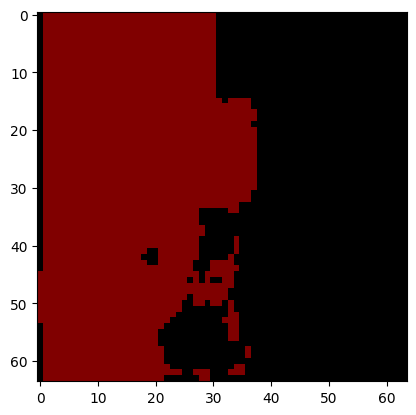

In [ ]:
img = cv2.imread(
    "Material Detection/original/Test/images/0.jpeg"
)
mask = predict(model, img)
plot_mask(mask)


## Results

Run-Length encoding (RLE)

The Run-Length encoding function performs run-length encoding on a binary mask array by first identifying the indices of the foreground pixels. It then iterates through these indices, grouping consecutive pixels into runs. For each run, it records the start position and the length of the run, resulting in a list of start positions and lengths. This method efficiently compresses the mask data by only storing information about the runs of foreground pixels, rather than every individual pixel.

In [ ]:
def rle_encode(x, fg_val=1):
    dots = np.where(x.T.flatten() == fg_val)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if b > prev + 1:
            run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths


def list_to_string(x):
    if x:  # non-empty list
        s = str(x).replace("[", "").replace("]", "").replace(",", "")
    else:
        s = "-"
    return s

In [ ]:
model = UNet(n_channels=3, n_classes=2)
model.load_state_dict(torch.load("best.pt"))


<All keys matched successfully>

In [ ]:
import os
import pandas as pd

df = pd.DataFrame(columns=["id", "pixels"])
test_dir = "/content/Material Detection/original/Test/images/"
for i, f in tqdm(enumerate(os.listdir(test_dir)), total=len(os.listdir(test_dir))):
    img = cv2.imread(test_dir + f)
    mask = predict(model, img, device="cuda")
    pred = list_to_string(rle_encode(mask))
    df.loc[i] = [f[:-5], pred]
df.to_csv("results.csv", index=None)


100%|██████████| 381/381 [00:18<00:00, 20.18it/s]
